<a href="https://colab.research.google.com/github/edanuryardim/data-visualization-basics/blob/main/lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns

In [2]:
data = sns.load_dataset('planets')
df = data.copy()
df.head()


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [4]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [5]:
# obje veri tipini kategorik olarak atamalıyız. 
import pandas as pd
df["method"]=pd.Categorical(df.method)

In [6]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [7]:
df.shape

(1035, 6)

In [8]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [10]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035.0,NaN,NaN,NaN,1.785507,1.240976,1.0,1.0,1.0,2.0,7.0
orbital_period,992.0,NaN,NaN,NaN,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,NaN,NaN,NaN,2.638161,3.818617,0.0036,0.229,1.26,3.04,25.0
distance,808.0,NaN,NaN,NaN,264.069282,733.116493,1.35,32.56,55.25,178.5,8500.0
year,1035.0,NaN,NaN,NaN,2009.070531,3.972567,1989.0,2007.0,2010.0,2012.0,2014.0


In [11]:
# boş değer var mı yok mu döndürür
df.isna().values.any()

True

In [12]:
df.isna().sum() # kaç tane boş olduğunu döndürür

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [13]:
df["mass"].fillna(df.mass.mean(), inplace=True) # boş olan mass değerlerini mass değerlerinin ortalamasıyla doldurur.

In [14]:
df.isna().sum()

method              0
number              0
orbital_period     43
mass                0
distance          227
year                0
dtype: int64

In [15]:
# tüm boşlukları doldurmak için 
df.fillna(df.mean(),inplace = True)
df.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [16]:
kat_df = df.select_dtypes(include = 'category')
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [21]:
kat_df.method.unique() # unique sınıfları döndürür

['Radial Velocity', 'Imaging', 'Eclipse Timing Variations', 'Transit', 'Astrometry', 'Transit Timing Variations', 'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing', 'Pulsation Timing Variations']
Categories (10, object): ['Astrometry', 'Eclipse Timing Variations', 'Imaging', 'Microlensing', ...,
                          'Pulsation Timing Variations', 'Radial Velocity', 'Transit',
                          'Transit Timing Variations']

In [19]:
kat_df.method.nunique() # unique sınıfların sayısını döndürür

10

In [20]:
kat_df.method.value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

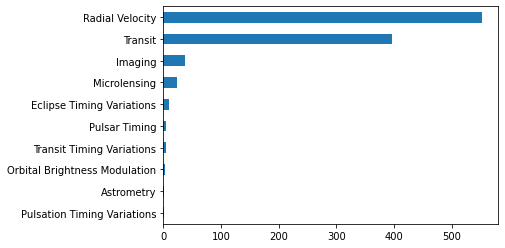

In [24]:
kat_df.method.value_counts().sort_values().plot.barh() # barh horizontal bir bar graph oluşturur.